# Statistical Analysis

In [1]:
!pip install scipy
!pip install pandas
!pip install statsmodels
!pip install numpy
!pip install prettytable
!pip install ipywidgets

In [2]:
from scipy.stats import f_oneway, ttest_ind
import itertools
import pandas as pd
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import numpy as np
from numpy import mean, std
from prettytable import PrettyTable
import matplotlib.pyplot as plt
import matplotlib.backends.backend_pdf
import ipywidgets as widgets

In [3]:
adhd_data = pd.read_csv('datasets/adhd_2018_features_tfidf_256.csv')
anxiety_data = pd.read_csv('datasets/anxiety_2018_features_tfidf_256.csv')
autism_data = pd.read_csv('datasets/autism_2018_features_tfidf_256.csv')
bpd_data = pd.read_csv('datasets/bpd_2018_features_tfidf_256.csv')
depression_data = pd.read_csv('datasets/depression_2018_features_tfidf_256.csv')
ed_data = pd.read_csv('datasets/EDAnonymous_2019_features_tfidf_256.csv')
healthanxiety_data = pd.read_csv('datasets/healthanxiety_2018_features_tfidf_256.csv')
ptsd_data = pd.read_csv('datasets/ptsd_2018_features_tfidf_256.csv')
schizophrenia_data = pd.read_csv('datasets/schizophrenia_2018_features_tfidf_256.csv')
socialanxiety_data = pd.read_csv('datasets/socialanxiety_2018_features_tfidf_256.csv')

datasets = {
    "adhd": adhd_data,
    "anxiety": anxiety_data,
    "autism": autism_data,
    "bpd": bpd_data,
    "depression": depression_data,
    "ed": ed_data,
    "healthanxiety": healthanxiety_data,
    "ptsd": ptsd_data,
    "schizophrenia": schizophrenia_data,
    "socialanxiety": socialanxiety_data
}

readability_parameters = [
    "automated_readability_index",
    "coleman_liau_index",
    "flesch_kincaid_grade_level",
    "flesch_reading_ease",
    "gulpease_index",
    "gunning_fog_index",
    "lix",
    "smog_index",
    "wiener_sachtextformel"
]

text_analysis = [
    "n_chars", "n_long_words", "n_monosyllable_words", "n_polysyllable_words",
    "n_sents", "n_syllables", "n_unique_words", "n_words", "sent_neg", "sent_neu",
    "sent_pos", "sent_compound", "economic_stress_total", "isolation_total",
    "substance_use_total", "guns_total", "domestic_stress_total",
    "suicidality_total", "punctuation", "liwc_1st_pers", "liwc_2nd_pers",
    "liwc_3rd_pers", "liwc_achievement", "liwc_adverbs", "liwc_affective_processes",
    "liwc_anger", "liwc_anxiety", "liwc_articles_article", "liwc_assent",
    "liwc_auxiliary_verbs", "liwc_biological", "liwc_body", "liwc_causation",
    "liwc_certainty", "liwc_cognitive", "liwc_common_verbs", "liwc_conjunctions",
    "liwc_death", "liwc_discrepancy", "liwc_exclusive", "liwc_family", "liwc_feel",
    "liwc_fillers", "liwc_friends", "liwc_future_tense", "liwc_health", "liwc_hear",
    "liwc_home", "liwc_humans", "liwc_impersonal_pronouns", "liwc_inclusive",
    "liwc_ingestion", "liwc_inhibition", "liwc_insight", "liwc_leisure", "liwc_money",
    "liwc_motion", "liwc_negations", "liwc_negative_emotion", "liwc_nonfluencies",
    "liwc_numbers", "liwc_past_tense", "liwc_perceptual_processes",
    "liwc_personal_pronouns", "liwc_positive_emotion", "liwc_prepositions",
    "liwc_present_tense", "liwc_quantifiers", "liwc_relativity", "liwc_religion",
    "liwc_sadness", "liwc_see", "liwc_sexual", "liwc_social_processes", "liwc_space",
    "liwc_swear_words", "liwc_tentative", "liwc_time", "liwc_total_functional",
    "liwc_total_pronouns", "liwc_work"
]

text_metrics = [
    "n_chars", "n_long_words", "n_monosyllable_words", "n_polysyllable_words",
    "n_sents", "n_syllables", "n_unique_words", "n_words", "punctuation"
]

sentiment_metrics = [
    "sent_neg", "sent_neu", "sent_pos", "sent_compound"
]

stress_and_health_metrics = [
    "economic_stress_total", "isolation_total", "substance_use_total", "guns_total",
    "domestic_stress_total", "suicidality_total"
]

liwc_metrics = [
    "liwc_1st_pers", "liwc_2nd_pers", "liwc_3rd_pers", "liwc_achievement",
    "liwc_adverbs", "liwc_affective_processes", "liwc_anger", "liwc_anxiety",
    "liwc_articles_article", "liwc_assent", "liwc_auxiliary_verbs",
    "liwc_biological", "liwc_body", "liwc_causation", "liwc_certainty",
    "liwc_cognitive", "liwc_common_verbs", "liwc_conjunctions", "liwc_death",
    "liwc_discrepancy", "liwc_exclusive", "liwc_family", "liwc_feel", "liwc_fillers",
    "liwc_friends", "liwc_future_tense", "liwc_health", "liwc_hear", "liwc_home",
    "liwc_humans", "liwc_impersonal_pronouns", "liwc_inclusive", "liwc_ingestion",
    "liwc_inhibition", "liwc_insight", "liwc_leisure", "liwc_money", "liwc_motion",
    "liwc_negations", "liwc_negative_emotion", "liwc_nonfluencies", "liwc_numbers",
    "liwc_past_tense", "liwc_perceptual_processes", "liwc_personal_pronouns",
    "liwc_positive_emotion", "liwc_prepositions", "liwc_present_tense",
    "liwc_quantifiers", "liwc_relativity", "liwc_religion", "liwc_sadness", "liwc_see",
    "liwc_sexual", "liwc_social_processes", "liwc_space", "liwc_swear_words",
    "liwc_tentative", "liwc_time", "liwc_total_functional", "liwc_total_pronouns",
    "liwc_work"
]

tfidf_parameters = [
    "tfidf_abus",
    "tfidf_actual",
    "tfidf_addict",
    "tfidf_adhd",
    "tfidf_advic",
    "tfidf_ago",
    "tfidf_alcohol",
    "tfidf_almost",
    "tfidf_alon",
    "tfidf_alreadi",
    "tfidf_also",
    "tfidf_alway",
    "tfidf_amp",
    "tfidf_amp x200b",
    "tfidf_ani",
    "tfidf_anoth",
    "tfidf_anxieti",
    "tfidf_anxious",
    "tfidf_anymor",
    "tfidf_anyon",
    "tfidf_anyon els",
    "tfidf_anyth",
    "tfidf_around",
    "tfidf_ask",
    "tfidf_attack",
    "tfidf_away",
    "tfidf_back",
    "tfidf_bad",
    "tfidf_becaus",
    "tfidf_becom",
    "tfidf_befor",
    "tfidf_believ",
    "tfidf_best",
    "tfidf_better",
    "tfidf_bit",
    "tfidf_bodi",
    "tfidf_bpd",
    "tfidf_brain",
    "tfidf_call",
    "tfidf_came",
    "tfidf_care",
    "tfidf_caus",
    "tfidf_chang",
    "tfidf_come",
    "tfidf_complet",
    "tfidf_constant",
    "tfidf_control",
    "tfidf_could",
    "tfidf_coupl",
    "tfidf_cri",
    "tfidf_day",
    "tfidf_deal",
    "tfidf_depress",
    "tfidf_diagnos",
    "tfidf_die",
    "tfidf_differ",
    "tfidf_disord",
    "tfidf_doctor",
    "tfidf_doe",
    "tfidf_done",
    "tfidf_dont",
    "tfidf_drink",
    "tfidf_drug",
    "tfidf_eat",
    "tfidf_els",
    "tfidf_emot",
    "tfidf_end",
    "tfidf_enough",
    "tfidf_etc",
    "tfidf_even",
    "tfidf_ever",
    "tfidf_everi",
    "tfidf_everyon",
    "tfidf_everyth",
    "tfidf_experi",
    "tfidf_famili",
    "tfidf_fear",
    "tfidf_feel",
    "tfidf_feel like",
    "tfidf_felt",
    "tfidf_final",
    "tfidf_find",
    "tfidf_first",
    "tfidf_food",
    "tfidf_found",
    "tfidf_friend",
    "tfidf_fuck",
    "tfidf_get",
    "tfidf_give",
    "tfidf_go",
    "tfidf_good",
    "tfidf_got",
    "tfidf_great",
    "tfidf_guess",
    "tfidf_guy",
    "tfidf_happen",
    "tfidf_happi",
    "tfidf_hard",
    "tfidf_hate",
    "tfidf_head",
    "tfidf_health",
    "tfidf_hear",
    "tfidf_heart",
    "tfidf_help",
    "tfidf_high",
    "tfidf_home",
    "tfidf_hope",
    "tfidf_hour",
    "tfidf_hous",
    "tfidf_hurt",
    "tfidf_idea",
    "tfidf_im",
    "tfidf_issu",
    "tfidf_job",
    "tfidf_keep",
    "tfidf_kill",
    "tfidf_kind",
    "tfidf_know",
    "tfidf_last",
    "tfidf_late",
    "tfidf_leav",
    "tfidf_left",
    "tfidf_let",
    "tfidf_life",
    "tfidf_like",
    "tfidf_littl",
    "tfidf_live",
    "tfidf_long",
    "tfidf_look",
    "tfidf_lose",
    "tfidf_lost",
    "tfidf_lot",
    "tfidf_love",
    "tfidf_made",
    "tfidf_make",
    "tfidf_mani",
    "tfidf_mayb",
    "tfidf_mean",
    "tfidf_med",
    "tfidf_medic",
    "tfidf_mental",
    "tfidf_might",
    "tfidf_mind",
    "tfidf_mom",
    "tfidf_month",
    "tfidf_move",
    "tfidf_much",
    "tfidf_need",
    "tfidf_never",
    "tfidf_new",
    "tfidf_next",
    "tfidf_night",
    "tfidf_normal",
    "tfidf_noth",
    "tfidf_notic",
    "tfidf_old",
    "tfidf_onc",
    "tfidf_one",
    "tfidf_onli",
    "tfidf_pain",
    "tfidf_panic",
    "tfidf_parent",
    "tfidf_part",
    "tfidf_past",
    "tfidf_peopl",
    "tfidf_person",
    "tfidf_place",
    "tfidf_pleas",
    "tfidf_point",
    "tfidf_possibl",
    "tfidf_post",
    "tfidf_pretti",
    "tfidf_probabl",
    "tfidf_problem",
    "tfidf_ptsd",
    "tfidf_put",
    "tfidf_question",
    "tfidf_quit",
    "tfidf_read",
    "tfidf_real",
    "tfidf_realli",
    "tfidf_reason",
    "tfidf_recent",
    "tfidf_relationship",
    "tfidf_rememb",
    "tfidf_right",
    "tfidf_said",
    "tfidf_say",
    "tfidf_scare",
    "tfidf_school",
    "tfidf_see",
    "tfidf_seem",
    "tfidf_self",
    "tfidf_sever",
    "tfidf_shit",
    "tfidf_sinc",
    "tfidf_situat",
    "tfidf_sleep",
    "tfidf_social",
    "tfidf_someon",
    "tfidf_someth",
    "tfidf_sometim",
    "tfidf_sorri",
    "tfidf_start",
    "tfidf_stay",
    "tfidf_still",
    "tfidf_stop",
    "tfidf_stress",
    "tfidf_struggl",
    "tfidf_stuff",
    "tfidf_suicid",
    "tfidf_support",
    "tfidf_sure",
    "tfidf_symptom",
    "tfidf_take",
    "tfidf_talk",
    "tfidf_tell",
    "tfidf_thank",
    "tfidf_therapi",
    "tfidf_therapist",
    "tfidf_thing",
    "tfidf_think",
    "tfidf_though",
    "tfidf_thought",
    "tfidf_time",
    "tfidf_tire",
    "tfidf_today",
    "tfidf_told",
    "tfidf_took",
    "tfidf_tri",
    "tfidf_turn",
    "tfidf_two",
    "tfidf_understand",
    "tfidf_us",
    "tfidf_use",
    "tfidf_usual",
    "tfidf_veri",
    "tfidf_want",
    "tfidf_way",
    "tfidf_week",
    "tfidf_weight",
    "tfidf_well",
    "tfidf_went",
    "tfidf_whi",
    "tfidf_whole",
    "tfidf_wish",
    "tfidf_without",
    "tfidf_wonder",
    "tfidf_work",
    "tfidf_worri",
    "tfidf_wors",
    "tfidf_would",
    "tfidf_wrong",
    "tfidf_x200b",
    "tfidf_year"
]

diseases = list(datasets.keys())

## Helper Functions

In [4]:
def pretty_table(df, significant_pairs):
    for pair in df.index:
        for parameter in df.columns:
            if pair in significant_pairs and parameter in significant_pairs[pair]:
                df.loc[pair, parameter] = 'Significant'
            else:
                df.loc[pair, parameter] = 'Insignificant'

    table = PrettyTable()

    table.field_names = ["Condition Pair"] + list(df.columns)
    for index, row in df.iterrows():
        table.add_row([index] + list(row))

    print(table)


def export_pdf_png(df, filename, kind):
    if (kind == "readability"):
        fig, ax =plt.subplots(figsize=(30, 8))
    elif (kind == "text"):
        fig, ax =plt.subplots(figsize=(100, 8))
    elif (kind == "sentiment_analysis"):
        fig, ax =plt.subplots(figsize=(15, 8))
    elif (kind == "stress_and_health"):
        fig, ax =plt.subplots(figsize=(20, 8))
    elif (kind == "liwc"):
        fig, ax =plt.subplots(figsize=(210, 8))
    

    colormap = {"Significant": "red",
                "Insignificant": "white",
                "adhd": "white",
                "anxiety": "white",
                "autism": "white",
                "bpd": "white",
                "depression": "white",
                "ed": "white",
                "healthanxiety": "white",
                "ptsd": "white",
                "schizophrenia": "white",
                "socialanxiety": "white"
                }

    # Create a new DataFrame with each level of the MultiIndex as a separate column
    df_reset = df.reset_index()
    df_reset.rename(columns={'level_0': 'Disease 1', 'level_1': 'Disease 2'}, inplace=True)

    table = ax.table(cellText=df_reset.values, cellColours=[[colormap[i] for i in j] for j in df_reset.values], cellLoc = 'center', loc='center', colLabels=df_reset.columns)

    ax.axis('off')
    if (kind == "readability"):
        pdf = matplotlib.backends.backend_pdf.PdfPages("readability_statistical_analysis/readability_" + filename + ".pdf")
    elif (kind == "text"):
        pdf = matplotlib.backends.backend_pdf.PdfPages("text_analysis_statistical_analysis/text_metrics/text_metrics_" + filename + ".pdf")
    elif (kind == "sentiment_analysis"):
        pdf = matplotlib.backends.backend_pdf.PdfPages("text_analysis_statistical_analysis/sentiment/sentiment_" + filename + ".pdf")
    elif (kind == "stress_and_health"):
        pdf = matplotlib.backends.backend_pdf.PdfPages("text_analysis_statistical_analysis/stress_and_health/stress_and_health_" + filename + ".pdf")
    elif (kind == "liwc"):
        pdf = matplotlib.backends.backend_pdf.PdfPages("text_analysis_statistical_analysis/liwc/liwc_" + filename + ".pdf")
    pdf.savefig(fig, bbox_inches='tight')
    pdf.close()

    if (kind == "readability"):
        plt.savefig("readability_statistical_analysis/readability_" + filename + ".png", bbox_inches='tight')
    elif (kind == "text"):
        plt.savefig("text_analysis_statistical_analysis/text_metrics/text_matrics_" + filename + ".png", bbox_inches='tight')
    elif (kind == "sentiment_analysis"):
        plt.savefig("text_analysis_statistical_analysis/sentiment/sentiment_" + filename + ".png", bbox_inches='tight')
    elif (kind == "stress_and_health"):
        plt.savefig("text_analysis_statistical_analysis/stress_and_health/stress_and_health" + filename + ".png", bbox_inches='tight')
    elif (kind == "liwc"):
        plt.savefig("text_analysis_statistical_analysis/liwc/liwc_" + filename + ".png", bbox_inches='tight')

def export_ipywidgets(df, significant_pairs):
    size = len(df.columns) + 2
    parameters = list(df.columns)

    for pair in df.index:
        for parameter in df.columns:
            if pair in significant_pairs and parameter in significant_pairs[pair]:
                df.loc[pair, parameter] = 'Significant'
            else:
                df.loc[pair, parameter] = 'Insignificant'

    items = [widgets.Button(description='' if pair in df.index and parameter in parameters else parameter if parameter in parameters else pair[j], 
                            layout=widgets.Layout(width="100px"), 
                            style=widgets.ButtonStyle(button_color='red' if pair in df.index and parameter in parameters and df.loc[pair, parameter] == 'Significant' else 'pink' if pair in df.index and parameter in parameters and df.loc[pair, parameter] == 'Insignificant' else 'white')) 
            for i, pair in enumerate(itertools.chain([('', '')], df.index)) for j, parameter in enumerate(list(pair) + list(df.columns))]
    grid = widgets.GridBox(items, layout=widgets.Layout(grid_template_columns="repeat(" + str(size) + ", 100px)"))
    return grid

## ANOVA Test

The F-statistic and p-value are both outcomes of an ANOVA test, which is used to determine if there are statistically significant differences between groups.

* F-statistic: This statistic represents the ratio of the variability between groups to the variability within groups. A higher F-statistic suggests that the means of the groups are more different from each other relative to the variation within each group.

* p-value: This value indicates the probability of obtaining results as extreme as the ones observed in the data, assuming that the null hypothesis is true (i.e., assuming there are no differences between the groups). A lower p-value suggests stronger evidence against the null hypothesis. Typically, a p-value below a certain significance level (commonly 0.05) is considered statistically significant.

In [5]:
def anova_test(parameter_list):
    anova_significant_pairs = {}
    anova_insignificant_pairs = {}

    for parameter in parameter_list:
        for pair in itertools.combinations(diseases, 2):
            disease_1 = pair[0]
            disease_2 = pair[1]

            group_1 = datasets[disease_1][parameter]
            group_2 = datasets[disease_2][parameter]

            f_stat, p_value = f_oneway(group_1, group_2)
            if p_value < 0.05: 
                if (disease_1, disease_2) not in anova_significant_pairs:
                    anova_significant_pairs[(disease_1, disease_2)] = []
                anova_significant_pairs[(disease_1, disease_2)].append(parameter)
            else:
                if (disease_1, disease_2) not in anova_insignificant_pairs:
                    anova_insignificant_pairs[(disease_1, disease_2)] = []
                anova_insignificant_pairs[(disease_1, disease_2)].append(parameter)
            print(f"ANOVA results for {parameter} between {disease_1} and {disease_2}: F-statistic = {f_stat}, p-value = {p_value}")

    for pair, parameters in anova_significant_pairs.items():
        if pair in anova_insignificant_pairs:
            print(f"{pair[0]} and {pair[1]}: {', '.join(parameters)} : {', '.join(anova_insignificant_pairs[pair])}")
        else:
            print(f"{pair[0]} and {pair[1]}: {', '.join(parameters)} : No insignificant parameters")
    for pair, parameters in anova_insignificant_pairs.items():
        if pair not in anova_significant_pairs:
            print(f"{pair[0]} and {pair[1]}: No significant parameters : {', '.join(parameters)}")
    
    return anova_significant_pairs

## T-Test

The t-test assesses if there's a significant difference between two group means. It measures the size of the difference relative to the variability in the data.

* T-statistic: Shows the magnitude of the difference between group means. A higher value indicates a larger difference.

* P-value: Indicates the probability of observing such a difference if there's no real distinction between groups. A smaller p-value suggests a significant difference between groups.

* Interpretation: A small p-value (typically < 0.05) indicates a likely real difference between groups. A larger p-value suggests the observed difference might be due to chance.

In [6]:
def t_test(parameter_list):
    t_test_significant_pairs = {}
    t_test_insignificant_pairs = {}

    for parameter in parameter_list:
        for pair in itertools.combinations(diseases, 2):
            disease_1 = pair[0]
            disease_2 = pair[1]

            group_1 = datasets[disease_1][parameter]
            group_2 = datasets[disease_2][parameter]

            t_stat, p_value = ttest_ind(group_1, group_2)
            if p_value < 0.05: 
                if (disease_1, disease_2) not in t_test_significant_pairs:
                    t_test_significant_pairs[(disease_1, disease_2)] = []
                t_test_significant_pairs[(disease_1, disease_2)].append(parameter)
            else:
                if (disease_1, disease_2) not in t_test_insignificant_pairs:
                    t_test_insignificant_pairs[(disease_1, disease_2)] = []
                t_test_insignificant_pairs[(disease_1, disease_2)].append(parameter)
            print(f"T-test results for {parameter} between {disease_1} and {disease_2}: T-statistic = {t_stat}, p-value = {p_value}")

    for pair, parameters in t_test_significant_pairs.items():
        if pair in t_test_insignificant_pairs:
            print(f"{pair[0]} and {pair[1]}: {', '.join(parameters)} : {', '.join(t_test_insignificant_pairs[pair])}")
        else:
            print(f"{pair[0]} and {pair[1]}: {', '.join(parameters)} : No insignificant parameters")
    for pair, parameters in t_test_insignificant_pairs.items():
        if pair not in t_test_significant_pairs:
            print(f"{pair[0]} and {pair[1]}: No significant parameters : {', '.join(parameters)}")
    
    return t_test_significant_pairs

## Tukey's HSD Test

Tukey's HSD test is employed after an ANOVA to pinpoint specific group differences among three or more groups:

* Test Statistic: The test statistic quantifies the difference between group means in relation to within-group variability. Larger values denote more substantial differences.

* P-value: This value signifies the likelihood of observing extreme differences in sample means (or larger) if there were no actual differences between the population means. A smaller p-value (often < 0.05) suggests strong evidence against the null hypothesis.

Null hypotesis: There is no difference between the means of the groups.

In [7]:
def tukey_test(parameter_list):
    tukey_significant_pairs = {}
    tukey_insignificant_pairs = {}

    for parameter in parameter_list:
        for pair in itertools.combinations(diseases, 2):
            disease_1 = pair[0]
            disease_2 = pair[1]

            group_1 = datasets[disease_1][parameter]
            group_2 = datasets[disease_2][parameter]

            tukey_results = pairwise_tukeyhsd(np.concatenate((group_1, group_2)), np.concatenate((np.repeat(disease_1, len(group_1)), np.repeat(disease_2, len(group_2)))))
            if tukey_results.reject.mean() == True: 
                if (disease_1, disease_2) not in tukey_significant_pairs:
                    tukey_significant_pairs[(disease_1, disease_2)] = []
                tukey_significant_pairs[(disease_1, disease_2)].append(parameter)
            else:
                if (disease_1, disease_2) not in tukey_insignificant_pairs:
                    tukey_insignificant_pairs[(disease_1, disease_2)] = []
                tukey_insignificant_pairs[(disease_1, disease_2)].append(parameter)
            print(f"Tukey results for {parameter} between {disease_1} and {disease_2}: {tukey_results}")

    for pair, parameters in tukey_significant_pairs.items():
        if pair in tukey_insignificant_pairs:
            print(f"{pair[0]} and {pair[1]}: {', '.join(parameters)} : {', '.join(tukey_insignificant_pairs[pair])}")
        else:
            print(f"{pair[0]} and {pair[1]}: {', '.join(parameters)} : No insignificant parameters")
    for pair, parameters in tukey_insignificant_pairs.items():
        if pair not in tukey_significant_pairs:
            print(f"{pair[0]} and {pair[1]}: No significant parameters : {', '.join(parameters)}")
    
    return tukey_significant_pairs

## Effect Size Calculation

Effect size measures quantify the strength of relationships, differences between means, or explained variance, aiding in the interpretation of study findings.

* Cohen's d: For comparing means between two groups, Cohen's d quantifies the difference in standard deviation units. Larger values indicate more substantial differences. A common benchmark is: small (around 0.2), medium (around 0.5), large (around 0.8).

* Interpretation Nuances: The significance of effect sizes varies across fields and contexts. Consider practical implications, previous research benchmarks, and the specific context of the study for accurate interpretation.

Null Hypothesis: There is no practical or significant difference or relationship between the compared groups or variables.

In [8]:
def effect_size_calculation(parameter_list):
    def cohen_d(group1, group2):
        diff = mean(group1) - mean(group2)
        pooled_std = ((len(group1) - 1) * std(group1) ** 2 + (len(group2) - 1) * std(group2) ** 2) / (len(group1) + len(group2) - 2)
        pooled_std = pooled_std ** 0.5
        return diff / pooled_std

    effect_sizes = {}
    cohens_d_significant_parameters = {pair: [] for pair in itertools.combinations(diseases, 2)}
    cohens_d_insignificant_parameters = {pair: [] for pair in itertools.combinations(diseases, 2)}

    # Threshold for Cohen's d
    cohens_d_threshold = 0.2 

    for parameter in parameter_list:
        for pair in itertools.combinations(diseases, 2):
            dataset_1 = datasets[pair[0]][parameter]
            dataset_2 = datasets[pair[1]][parameter]

            effect_size = cohen_d(dataset_1, dataset_2)
            if parameter not in effect_sizes:
                effect_sizes[parameter] = {}
            effect_sizes[parameter][pair] = effect_size

            if abs(effect_size) >= cohens_d_threshold:
                cohens_d_significant_parameters[pair].append(parameter)
            else:
                cohens_d_insignificant_parameters[pair].append(parameter)

    print("\nEffect sizes for all combinations of datasets and parameters:")
    for parameter, pairs in effect_sizes.items():
        print(f"Effect sizes for {parameter}:")
        for pair, effect_size in pairs.items():
            print(f"{pair}: Cohen's d = {effect_size}")
        print()

    print("Summary of significant and insignificant parameters for Cohen's d test:")
    for pair in itertools.combinations(diseases, 2):
        significant = cohens_d_significant_parameters[pair]
        insignificant = cohens_d_insignificant_parameters[pair]
        print(f"{pair[0]} and {pair[1]}: Significant parameters - {significant if significant else 'None'}, Insignificant parameters - {insignificant if insignificant else 'None'}")
    
    return cohens_d_significant_parameters

## Readability

### Anova Test

In [9]:
readability_anova_significant_pairs = anova_test(readability_parameters)

readability_anova_df = pd.DataFrame(index=pd.MultiIndex.from_tuples(itertools.combinations(datasets.keys(), 2)), columns=readability_parameters)

ANOVA results for automated_readability_index between adhd and anxiety: F-statistic = 135.16592711157259, p-value = 4.2508434680442095e-31
ANOVA results for automated_readability_index between adhd and autism: F-statistic = 48.27619672556894, p-value = 4.108654483849592e-12
ANOVA results for automated_readability_index between adhd and bpd: F-statistic = 115.24789117721282, p-value = 1.088934972823013e-26
ANOVA results for automated_readability_index between adhd and depression: F-statistic = 852.5794182903754, p-value = 8.305541612583729e-185
ANOVA results for automated_readability_index between adhd and ed: F-statistic = 470.58666550801547, p-value = 2.4739430633821322e-101
ANOVA results for automated_readability_index between adhd and healthanxiety: F-statistic = 26.202096608352424, p-value = 3.172247129220692e-07
ANOVA results for automated_readability_index between adhd and ptsd: F-statistic = 0.2280302897328065, p-value = 0.6330061576476655
ANOVA results for automated_readability

In [10]:
pretty_table(readability_anova_df, readability_anova_significant_pairs)

+------------------------------------+-----------------------------+--------------------+----------------------------+---------------------+----------------+-------------------+---------------+---------------+-----------------------+
|           Condition Pair           | automated_readability_index | coleman_liau_index | flesch_kincaid_grade_level | flesch_reading_ease | gulpease_index | gunning_fog_index |      lix      |   smog_index  | wiener_sachtextformel |
+------------------------------------+-----------------------------+--------------------+----------------------------+---------------------+----------------+-------------------+---------------+---------------+-----------------------+
|        ('adhd', 'anxiety')         |         Significant         |    Significant     |        Significant         |     Significant     |  Significant   |    Significant    |  Significant  |  Significant  |      Significant      |
|         ('adhd', 'autism')         |         Significant      

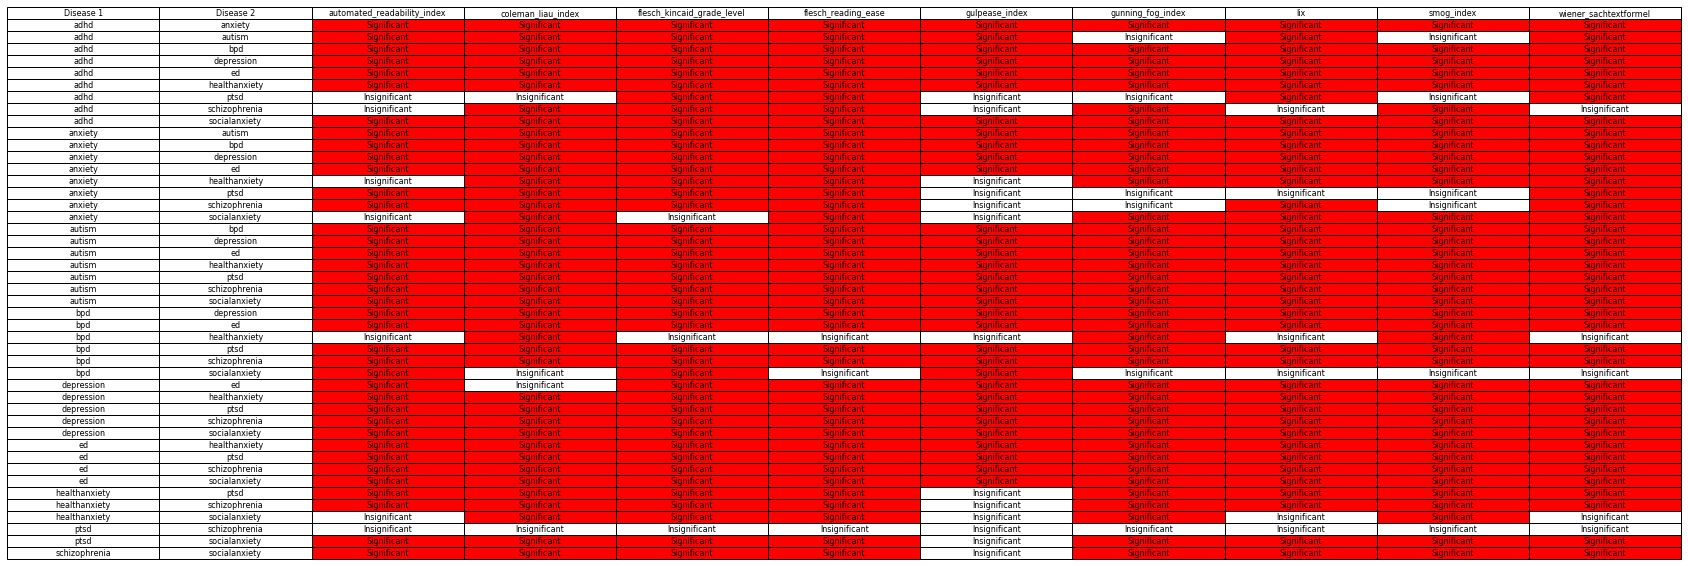

In [11]:
export_pdf_png(readability_anova_df, "anova_test", "readability")

In [12]:
export_ipywidgets(readability_anova_df, readability_anova_significant_pairs)

GridBox(children=(Button(layout=Layout(width='100px'), style=ButtonStyle(button_color='white')), Button(layout…

### T-Test

In [13]:
readability_t_test_significant_pairs = t_test(readability_parameters)

readability_t_test_df = pd.DataFrame(index=pd.MultiIndex.from_tuples(itertools.combinations(datasets.keys(), 2)), columns=readability_parameters)

T-test results for automated_readability_index between adhd and anxiety: T-statistic = 11.626088211929789, p-value = 4.2508434680488645e-31
T-test results for automated_readability_index between adhd and autism: T-statistic = -6.9481074204108975, p-value = 4.108654483850908e-12
T-test results for automated_readability_index between adhd and bpd: T-statistic = 10.735357058673586, p-value = 1.0889349728203145e-26
T-test results for automated_readability_index between adhd and depression: T-statistic = 29.19896262353126, p-value = 8.305541612711661e-185
T-test results for automated_readability_index between adhd and ed: T-statistic = 21.693009600053553, p-value = 2.4739430633892194e-101
T-test results for automated_readability_index between adhd and healthanxiety: T-statistic = 5.118798355898815, p-value = 3.1722471292037337e-07
T-test results for automated_readability_index between adhd and ptsd: T-statistic = 0.47752517183160764, p-value = 0.6330061576483705
T-test results for automated

In [14]:
pretty_table(readability_t_test_df, readability_t_test_significant_pairs)

+------------------------------------+-----------------------------+--------------------+----------------------------+---------------------+----------------+-------------------+---------------+---------------+-----------------------+
|           Condition Pair           | automated_readability_index | coleman_liau_index | flesch_kincaid_grade_level | flesch_reading_ease | gulpease_index | gunning_fog_index |      lix      |   smog_index  | wiener_sachtextformel |
+------------------------------------+-----------------------------+--------------------+----------------------------+---------------------+----------------+-------------------+---------------+---------------+-----------------------+
|        ('adhd', 'anxiety')         |         Significant         |    Significant     |        Significant         |     Significant     |  Significant   |    Significant    |  Significant  |  Significant  |      Significant      |
|         ('adhd', 'autism')         |         Significant      

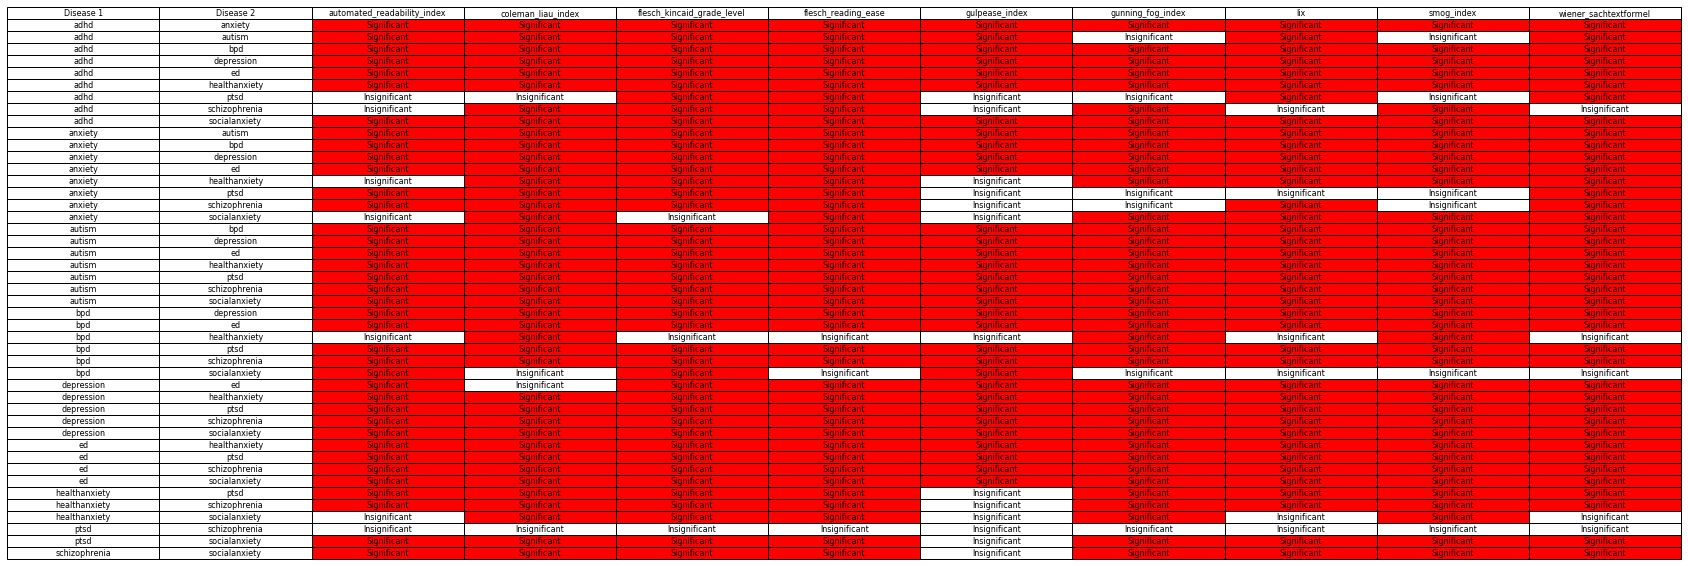

In [15]:
export_pdf_png(readability_t_test_df, "t_test", "readability")

In [16]:
export_ipywidgets(readability_t_test_df, readability_t_test_significant_pairs)

GridBox(children=(Button(layout=Layout(width='100px'), style=ButtonStyle(button_color='white')), Button(layout…

### Tukey's HSD Test

In [17]:
readability_tukey_significant_pairs = tukey_test(readability_parameters)

readability_tukey_df = pd.DataFrame(index=pd.MultiIndex.from_tuples(itertools.combinations(datasets.keys(), 2)), columns=readability_parameters)

Tukey results for automated_readability_index between adhd and anxiety: Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1  group2 meandiff p-adj  lower   upper  reject
----------------------------------------------------
  adhd anxiety  -0.5517   0.0 -0.6448 -0.4587   True
----------------------------------------------------
Tukey results for automated_readability_index between adhd and autism: Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj lower  upper  reject
-------------------------------------------------
  adhd autism    0.845   0.0 0.6066 1.0834   True
-------------------------------------------------
Tukey results for automated_readability_index between adhd and bpd: Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj  lower   upper  reject
---------------------------------------------------
  adhd    bpd  -0.7676   0.0 -0.9078 -0.6275   True
---------------------------------------------------
Tukey result

In [18]:
pretty_table(readability_tukey_df, readability_tukey_significant_pairs)

+------------------------------------+-----------------------------+--------------------+----------------------------+---------------------+----------------+-------------------+---------------+---------------+-----------------------+
|           Condition Pair           | automated_readability_index | coleman_liau_index | flesch_kincaid_grade_level | flesch_reading_ease | gulpease_index | gunning_fog_index |      lix      |   smog_index  | wiener_sachtextformel |
+------------------------------------+-----------------------------+--------------------+----------------------------+---------------------+----------------+-------------------+---------------+---------------+-----------------------+
|        ('adhd', 'anxiety')         |         Significant         |    Significant     |        Significant         |     Significant     |  Significant   |    Significant    |  Significant  |  Significant  |      Significant      |
|         ('adhd', 'autism')         |         Significant      

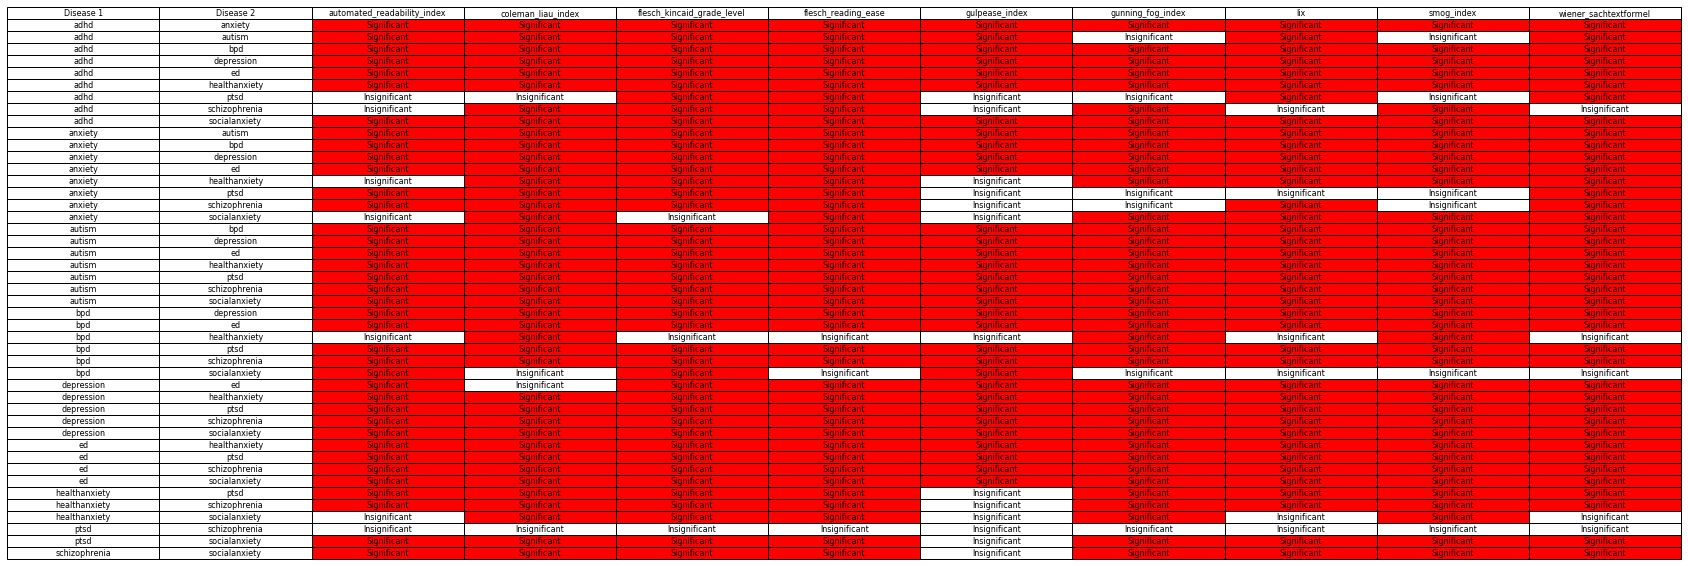

In [19]:
export_pdf_png(readability_tukey_df, "tukey_test", "readability")

In [20]:
export_ipywidgets(readability_tukey_df, readability_tukey_significant_pairs)

GridBox(children=(Button(layout=Layout(width='100px'), style=ButtonStyle(button_color='white')), Button(layout…

### Effect Size Calculation

In [21]:
readability_cohens_d_significant_parameters = effect_size_calculation(readability_parameters)

readability_cohens_d_df = pd.DataFrame(index=pd.MultiIndex.from_tuples(itertools.combinations(datasets.keys(), 2)), columns=readability_parameters)


Effect sizes for all combinations of datasets and parameters:
Effect sizes for automated_readability_index:
('adhd', 'anxiety'): Cohen's d = 0.20542691322575443
('adhd', 'autism'): Cohen's d = -0.28313073414414663
('adhd', 'bpd'): Cohen's d = 0.2685520173547665
('adhd', 'depression'): Cohen's d = 0.44900807783643126
('adhd', 'ed'): Cohen's d = 0.5234501006471777
('adhd', 'healthanxiety'): Cohen's d = 0.19519113705540667
('adhd', 'ptsd'): Cohen's d = 0.019201112703271093
('adhd', 'schizophrenia'): Cohen's d = -0.05413634384586865
('adhd', 'socialanxiety'): Cohen's d = 0.2004498103547089
('anxiety', 'autism'): Cohen's d = -0.528228620973434
('anxiety', 'bpd'): Cohen's d = 0.08292862380496026
('anxiety', 'depression'): Cohen's d = 0.26908707008806526
('anxiety', 'ed'): Cohen's d = 0.3789275255000624
('anxiety', 'healthanxiety'): Cohen's d = 0.006467107651982374
('anxiety', 'ptsd'): Cohen's d = -0.18666370456672873
('anxiety', 'schizophrenia'): Cohen's d = -0.2698479290220464
('anxiety', 

## Text Analaysis

### ANOVA Test

In [22]:
text_anova_significant_pairs = anova_test(text_metrics)

text_anova_df = pd.DataFrame(index=pd.MultiIndex.from_tuples(itertools.combinations(datasets.keys(), 2)), columns=text_metrics)

ANOVA results for n_chars between adhd and anxiety: F-statistic = 13.405070874143082, p-value = 0.00025188939863927994
ANOVA results for n_chars between adhd and autism: F-statistic = 9.705000473155714, p-value = 0.0018466551032442764
ANOVA results for n_chars between adhd and bpd: F-statistic = 0.18229327102084628, p-value = 0.6694221665893232
ANOVA results for n_chars between adhd and depression: F-statistic = 0.5991979785761079, p-value = 0.4388903707589097
ANOVA results for n_chars between adhd and ed: F-statistic = 245.447173674542, p-value = 1.762389040582628e-54
ANOVA results for n_chars between adhd and healthanxiety: F-statistic = 1.0010425142287405, p-value = 0.31709939212640254
ANOVA results for n_chars between adhd and ptsd: F-statistic = 22.93830516422272, p-value = 1.7143584283642276e-06
ANOVA results for n_chars between adhd and schizophrenia: F-statistic = 11.109465977270444, p-value = 0.0008639762279880804
ANOVA results for n_chars between adhd and socialanxiety: F-sta

In [23]:
pretty_table(text_anova_df, text_anova_significant_pairs)

+------------------------------------+---------------+---------------+----------------------+----------------------+---------------+---------------+----------------+---------------+---------------+
|           Condition Pair           |    n_chars    |  n_long_words | n_monosyllable_words | n_polysyllable_words |    n_sents    |  n_syllables  | n_unique_words |    n_words    |  punctuation  |
+------------------------------------+---------------+---------------+----------------------+----------------------+---------------+---------------+----------------+---------------+---------------+
|        ('adhd', 'anxiety')         |  Significant  |  Significant  |    Insignificant     |     Significant      |  Significant  |  Significant  |  Significant   |  Significant  |  Significant  |
|         ('adhd', 'autism')         |  Significant  |  Significant  |     Significant      |     Significant      |  Significant  |  Significant  |  Significant   |  Significant  |  Significant  |
|         

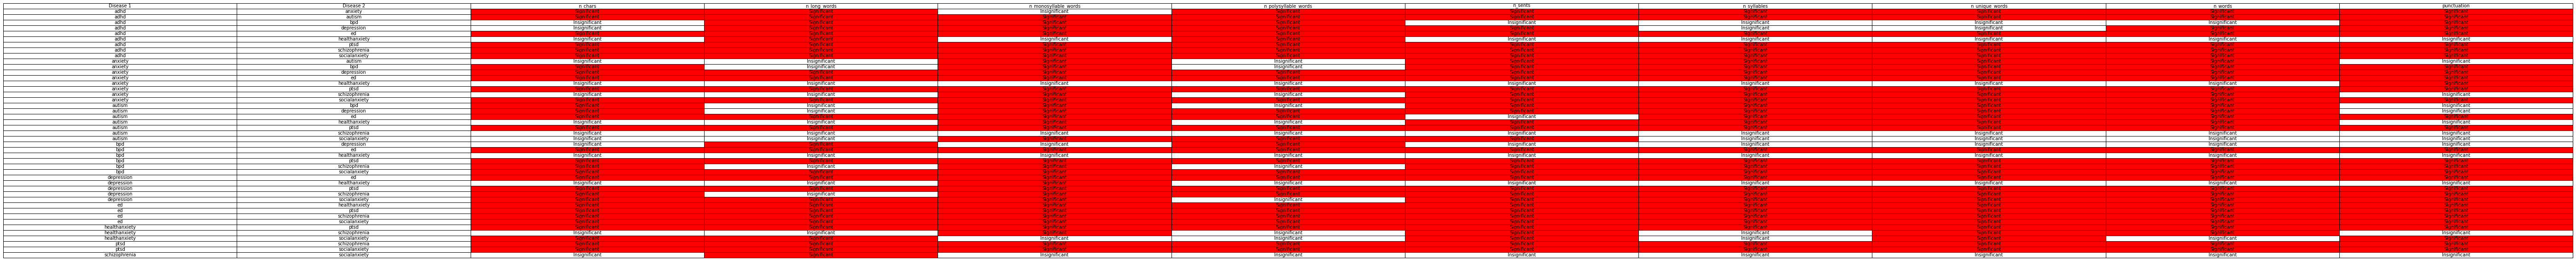

In [24]:
export_pdf_png(text_anova_df, "anova_test", "text")

In [25]:
export_ipywidgets(text_anova_df, text_anova_significant_pairs)

GridBox(children=(Button(layout=Layout(width='100px'), style=ButtonStyle(button_color='white')), Button(layout…

### T-Test

In [26]:
text_t_test_significant_pairs = t_test(text_metrics)

text_t_test_df = pd.DataFrame(index=pd.MultiIndex.from_tuples(itertools.combinations(datasets.keys(), 2)), columns=text_metrics)

T-test results for n_chars between adhd and anxiety: T-statistic = 3.6612936066564052, p-value = 0.0002518893986394588
T-test results for n_chars between adhd and autism: T-statistic = 3.1152849746300415, p-value = 0.0018466551032445776
T-test results for n_chars between adhd and bpd: T-statistic = 0.42695816073807846, p-value = 0.6694221665901288
T-test results for n_chars between adhd and depression: T-statistic = 0.77407879351918, p-value = 0.43889037075036574
T-test results for n_chars between adhd and ed: T-statistic = 15.666753769512752, p-value = 1.7623890405875126e-54
T-test results for n_chars between adhd and healthanxiety: T-statistic = 1.0005211213306475, p-value = 0.3170993921248589
T-test results for n_chars between adhd and ptsd: T-statistic = -4.789395072889969, p-value = 1.7143584283604077e-06
T-test results for n_chars between adhd and schizophrenia: T-statistic = 3.3330865541222368, p-value = 0.000863976227986744
T-test results for n_chars between adhd and socialanxi

In [27]:
pretty_table(text_t_test_df, text_t_test_significant_pairs)

+------------------------------------+---------------+---------------+----------------------+----------------------+---------------+---------------+----------------+---------------+---------------+
|           Condition Pair           |    n_chars    |  n_long_words | n_monosyllable_words | n_polysyllable_words |    n_sents    |  n_syllables  | n_unique_words |    n_words    |  punctuation  |
+------------------------------------+---------------+---------------+----------------------+----------------------+---------------+---------------+----------------+---------------+---------------+
|        ('adhd', 'anxiety')         |  Significant  |  Significant  |    Insignificant     |     Significant      |  Significant  |  Significant  |  Significant   |  Significant  |  Significant  |
|         ('adhd', 'autism')         |  Significant  |  Significant  |     Significant      |     Significant      |  Significant  |  Significant  |  Significant   |  Significant  |  Significant  |
|         

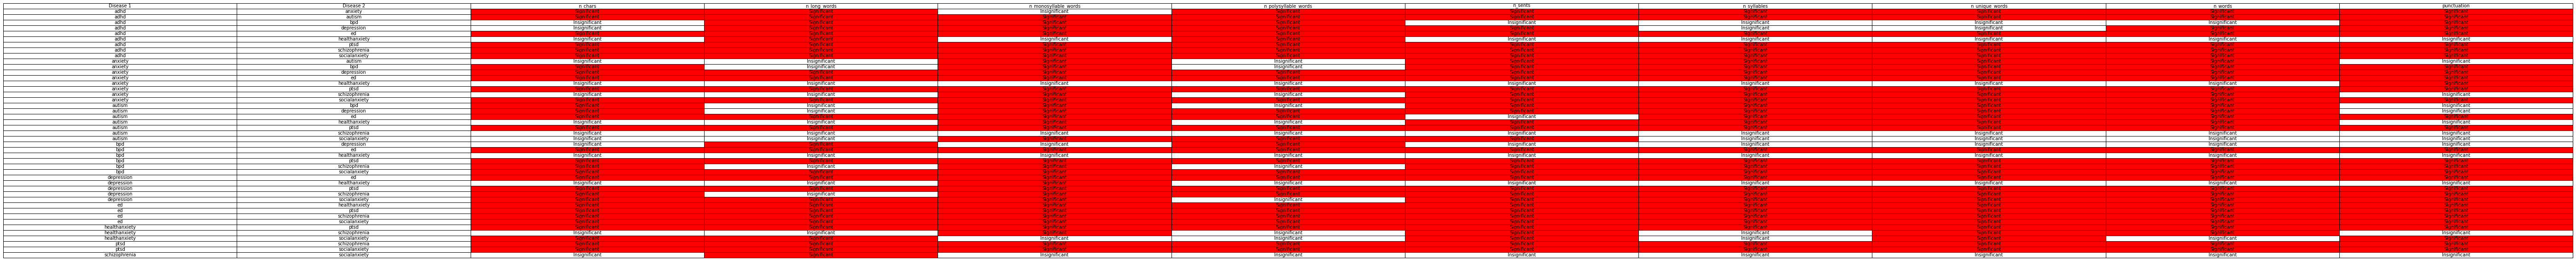

In [28]:
export_pdf_png(text_t_test_df, "t_test", "text")

In [29]:
export_ipywidgets(text_t_test_df, text_t_test_significant_pairs)

GridBox(children=(Button(layout=Layout(width='100px'), style=ButtonStyle(button_color='white')), Button(layout…

### Tukey's HSD Test

In [30]:
text_tukey_significant_pairs = tukey_test(text_metrics)

text_tukey_df = pd.DataFrame(index=pd.MultiIndex.from_tuples(itertools.combinations(datasets.keys(), 2)), columns=text_metrics)

Tukey results for n_chars between adhd and anxiety:  Multiple Comparison of Means - Tukey HSD, FWER=0.05  
group1  group2 meandiff p-adj   lower   upper   reject
------------------------------------------------------
  adhd anxiety -46.8377 0.0003 -71.913 -21.7623   True
------------------------------------------------------
Tukey results for n_chars between adhd and autism:   Multiple Comparison of Means - Tukey HSD, FWER=0.05  
group1 group2 meandiff p-adj    lower    upper   reject
-------------------------------------------------------
  adhd autism -97.1042 0.0018 -158.2095 -35.9989   True
-------------------------------------------------------
Tukey results for n_chars between adhd and bpd:  Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
  adhd    bpd  -8.1383 0.6694 -45.5036 29.2269  False
-----------------------------------------------------
Tukey results for n_char

In [31]:
pretty_table(text_tukey_df, text_tukey_significant_pairs)

+------------------------------------+---------------+---------------+----------------------+----------------------+---------------+---------------+----------------+---------------+---------------+
|           Condition Pair           |    n_chars    |  n_long_words | n_monosyllable_words | n_polysyllable_words |    n_sents    |  n_syllables  | n_unique_words |    n_words    |  punctuation  |
+------------------------------------+---------------+---------------+----------------------+----------------------+---------------+---------------+----------------+---------------+---------------+
|        ('adhd', 'anxiety')         |  Significant  |  Significant  |    Insignificant     |     Significant      |  Significant  |  Significant  |  Significant   |  Significant  |  Significant  |
|         ('adhd', 'autism')         |  Significant  |  Significant  |     Significant      |     Significant      |  Significant  |  Significant  |  Significant   |  Significant  |  Significant  |
|         

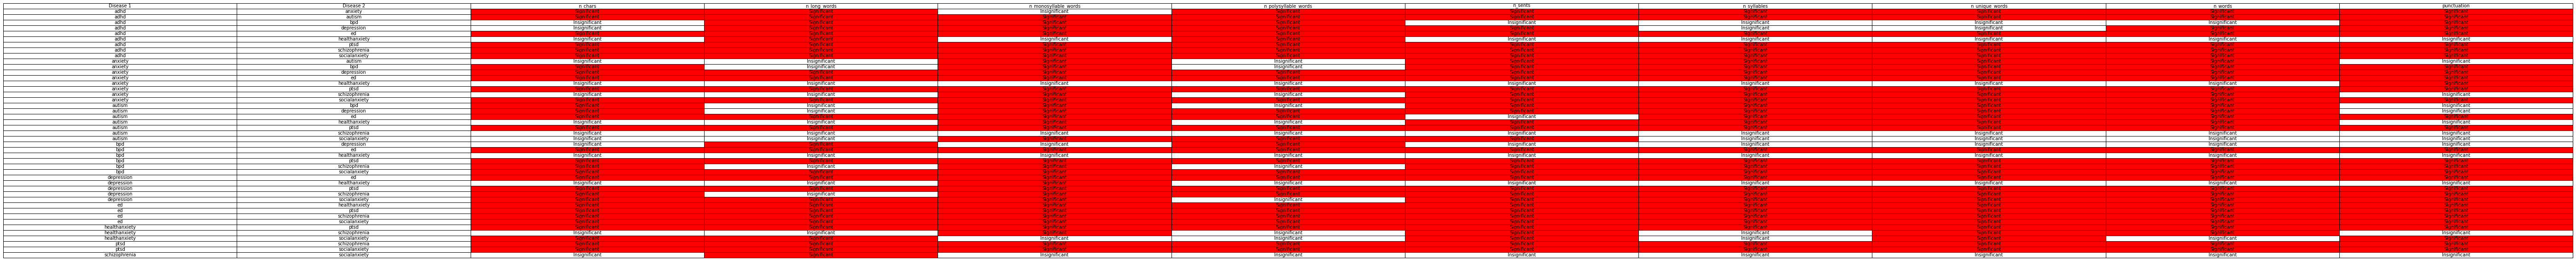

In [32]:
export_pdf_png(text_tukey_df, "tukey_test", "text")

In [33]:
export_ipywidgets(text_tukey_df, text_tukey_significant_pairs)

GridBox(children=(Button(layout=Layout(width='100px'), style=ButtonStyle(button_color='white')), Button(layout…

### Effect Size Calculation

In [34]:
text_cohens_d_significant_parameters = effect_size_calculation(text_metrics)

text_cohens_d_df = pd.DataFrame(index=pd.MultiIndex.from_tuples(itertools.combinations(datasets.keys(), 2)), columns=text_metrics)


Effect sizes for all combinations of datasets and parameters:
Effect sizes for n_chars:
('adhd', 'anxiety'): Cohen's d = 0.06469313383254793
('adhd', 'autism'): Cohen's d = 0.1269396250947085
('adhd', 'bpd'): Cohen's d = 0.010680630670536982
('adhd', 'depression'): Cohen's d = 0.011903418645330396
('adhd', 'ed'): Cohen's d = 0.37802915444109997
('adhd', 'healthanxiety'): Cohen's d = 0.03815113817930348
('adhd', 'ptsd'): Cohen's d = -0.19257757994476543
('adhd', 'schizophrenia'): Cohen's d = 0.11441689264579674
('adhd', 'socialanxiety'): Cohen's d = 0.11582255931266303
('anxiety', 'autism'): Cohen's d = 0.07272322596863598
('anxiety', 'bpd'): Cohen's d = -0.055238468410460984
('anxiety', 'depression'): Cohen's d = -0.047988813815643745
('anxiety', 'ed'): Cohen's d = 0.331293821634361
('anxiety', 'healthanxiety'): Cohen's d = -0.025941383722304718
('anxiety', 'ptsd'): Cohen's d = -0.2807211268218149
('anxiety', 'schizophrenia'): Cohen's d = 0.05903617851023709
('anxiety', 'socialanxiety

## Sentiment

### ANOVA Test

In [35]:
sentiement_anova_significant_pairs = anova_test(sentiment_metrics)

sentiment_anova_df = pd.DataFrame(index=pd.MultiIndex.from_tuples(itertools.combinations(datasets.keys(), 2)), columns=sentiment_metrics)

ANOVA results for sent_neg between adhd and anxiety: F-statistic = 2624.885813271, p-value = 0.0
ANOVA results for sent_neg between adhd and autism: F-statistic = 26.969008267698282, p-value = 2.1380679388582578e-07
ANOVA results for sent_neg between adhd and bpd: F-statistic = 619.8858053213593, p-value = 1.7154739515040075e-131
ANOVA results for sent_neg between adhd and depression: F-statistic = 3741.3178739794594, p-value = 0.0
ANOVA results for sent_neg between adhd and ed: F-statistic = 438.8576664483336, p-value = 8.1870839562586e-95
ANOVA results for sent_neg between adhd and healthanxiety: F-statistic = 640.2976913275317, p-value = 3.2948688485947566e-134
ANOVA results for sent_neg between adhd and ptsd: F-statistic = 385.3733964927555, p-value = 3.949498727830158e-83
ANOVA results for sent_neg between adhd and schizophrenia: F-statistic = 26.61886054858387, p-value = 2.556074442397354e-07
ANOVA results for sent_neg between adhd and socialanxiety: F-statistic = 552.60704385264

In [36]:
pretty_table(sentiment_anova_df, sentiement_anova_significant_pairs)

+------------------------------------+---------------+---------------+---------------+---------------+
|           Condition Pair           |    sent_neg   |    sent_neu   |    sent_pos   | sent_compound |
+------------------------------------+---------------+---------------+---------------+---------------+
|        ('adhd', 'anxiety')         |  Significant  |  Significant  | Insignificant |  Significant  |
|         ('adhd', 'autism')         |  Significant  | Insignificant |  Significant  |  Significant  |
|          ('adhd', 'bpd')           |  Significant  |  Significant  |  Significant  |  Significant  |
|       ('adhd', 'depression')       |  Significant  |  Significant  |  Significant  |  Significant  |
|           ('adhd', 'ed')           |  Significant  |  Significant  |  Significant  |  Significant  |
|     ('adhd', 'healthanxiety')      |  Significant  |  Significant  |  Significant  |  Significant  |
|          ('adhd', 'ptsd')          |  Significant  |  Significant  | In

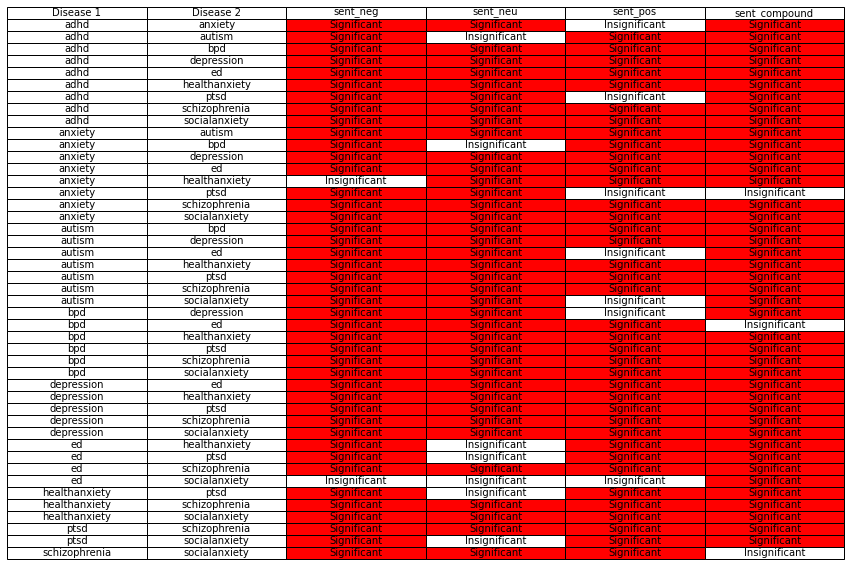

In [37]:
export_pdf_png(sentiment_anova_df, "anova_test", "sentiment_analysis")

In [38]:
export_ipywidgets(sentiment_anova_df, sentiement_anova_significant_pairs)

GridBox(children=(Button(layout=Layout(width='100px'), style=ButtonStyle(button_color='white')), Button(layout…

### T-Test

In [39]:
sentiment_t_test_significant_pairs = t_test(sentiment_metrics)

sentiment_t_test_df = pd.DataFrame(index=pd.MultiIndex.from_tuples(itertools.combinations(datasets.keys(), 2)), columns=sentiment_metrics)

T-test results for sent_neg between adhd and anxiety: T-statistic = -51.23363946930767, p-value = 0.0
T-test results for sent_neg between adhd and autism: T-statistic = 5.1931693856159, p-value = 2.1380679388587742e-07
T-test results for sent_neg between adhd and bpd: T-statistic = -24.89750600605128, p-value = 1.715473951498448e-131
T-test results for sent_neg between adhd and depression: T-statistic = -61.16631322860207, p-value = 0.0
T-test results for sent_neg between adhd and ed: T-statistic = -20.94892995950709, p-value = 8.187083956283305e-95
T-test results for sent_neg between adhd and healthanxiety: T-statistic = -25.30410423878964, p-value = 3.294868848575174e-134
T-test results for sent_neg between adhd and ptsd: T-statistic = -19.630929588095302, p-value = 3.949498727820155e-83
T-test results for sent_neg between adhd and schizophrenia: T-statistic = -5.159346911052197, p-value = 2.556074442393927e-07
T-test results for sent_neg between adhd and socialanxiety: T-statistic =

In [40]:
pretty_table(sentiment_t_test_df, sentiment_t_test_significant_pairs)

+------------------------------------+---------------+---------------+---------------+---------------+
|           Condition Pair           |    sent_neg   |    sent_neu   |    sent_pos   | sent_compound |
+------------------------------------+---------------+---------------+---------------+---------------+
|        ('adhd', 'anxiety')         |  Significant  |  Significant  | Insignificant |  Significant  |
|         ('adhd', 'autism')         |  Significant  | Insignificant |  Significant  |  Significant  |
|          ('adhd', 'bpd')           |  Significant  |  Significant  |  Significant  |  Significant  |
|       ('adhd', 'depression')       |  Significant  |  Significant  |  Significant  |  Significant  |
|           ('adhd', 'ed')           |  Significant  |  Significant  |  Significant  |  Significant  |
|     ('adhd', 'healthanxiety')      |  Significant  |  Significant  |  Significant  |  Significant  |
|          ('adhd', 'ptsd')          |  Significant  |  Significant  | In

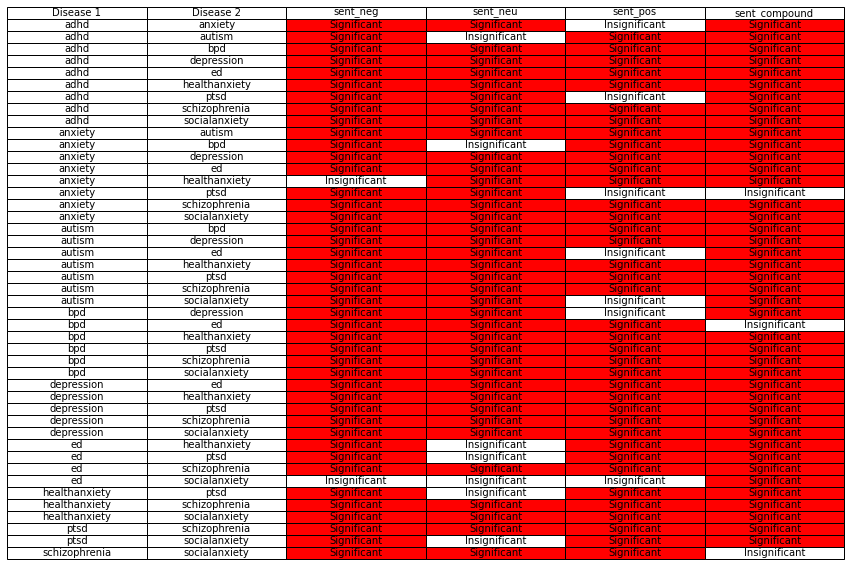

In [41]:
export_pdf_png(sentiment_t_test_df, "t_test", "sentiment_analysis")

In [42]:
export_ipywidgets(sentiment_t_test_df, sentiment_t_test_significant_pairs)

GridBox(children=(Button(layout=Layout(width='100px'), style=ButtonStyle(button_color='white')), Button(layout…

### Tukey's HSD Test

In [43]:
sentiment_tukey_significant_pairs = tukey_test(sentiment_metrics)

sentiment_tukey_df = pd.DataFrame(index=pd.MultiIndex.from_tuples(itertools.combinations(datasets.keys(), 2)), columns=sentiment_metrics)

Tukey results for sent_neg between adhd and anxiety: Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1  group2 meandiff p-adj lower  upper  reject
--------------------------------------------------
  adhd anxiety   0.0627   0.0 0.0603 0.0651   True
--------------------------------------------------
Tukey results for sent_neg between adhd and autism: Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj  lower   upper  reject
---------------------------------------------------
  adhd autism  -0.0134   0.0 -0.0184 -0.0083   True
---------------------------------------------------
Tukey results for sent_neg between adhd and bpd: Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj lower  upper  reject
-------------------------------------------------
  adhd    bpd    0.042   0.0 0.0387 0.0453   True
-------------------------------------------------
Tukey results for sent_neg between adhd and depression:  Multiple Comparison o

In [44]:
pretty_table(sentiment_tukey_df, sentiment_tukey_significant_pairs)

+------------------------------------+---------------+---------------+---------------+---------------+
|           Condition Pair           |    sent_neg   |    sent_neu   |    sent_pos   | sent_compound |
+------------------------------------+---------------+---------------+---------------+---------------+
|        ('adhd', 'anxiety')         |  Significant  |  Significant  | Insignificant |  Significant  |
|         ('adhd', 'autism')         |  Significant  | Insignificant |  Significant  |  Significant  |
|          ('adhd', 'bpd')           |  Significant  |  Significant  |  Significant  |  Significant  |
|       ('adhd', 'depression')       |  Significant  |  Significant  |  Significant  |  Significant  |
|           ('adhd', 'ed')           |  Significant  |  Significant  |  Significant  |  Significant  |
|     ('adhd', 'healthanxiety')      |  Significant  |  Significant  |  Significant  |  Significant  |
|          ('adhd', 'ptsd')          |  Significant  |  Significant  | In

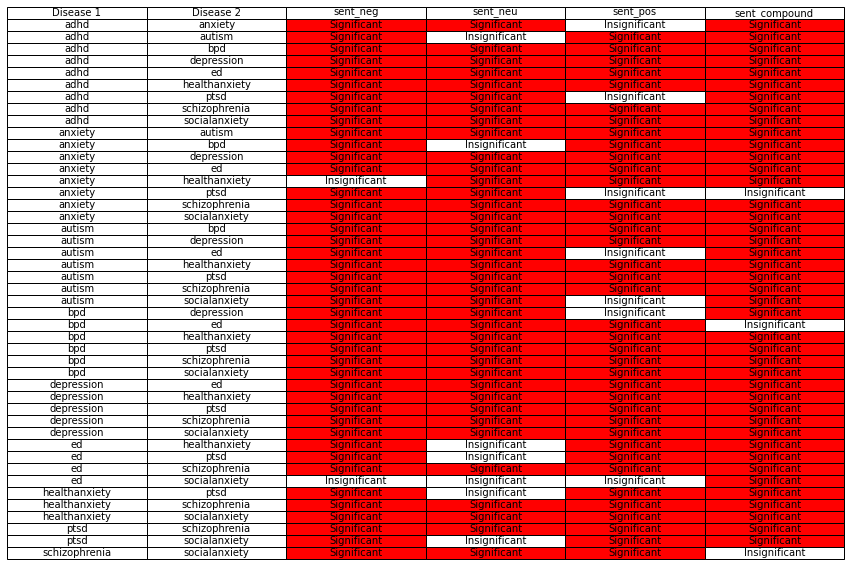

In [45]:
export_pdf_png(sentiment_tukey_df, "tukey_test", "sentiment_analysis")

In [46]:
export_ipywidgets(sentiment_tukey_df, sentiment_tukey_significant_pairs)

GridBox(children=(Button(layout=Layout(width='100px'), style=ButtonStyle(button_color='white')), Button(layout…

### Effect Size Calculation

In [47]:
sentiment_cohens_d_significant_parameters = effect_size_calculation(sentiment_metrics)

sentiment_cohens_d_df = pd.DataFrame(index=pd.MultiIndex.from_tuples(itertools.combinations(datasets.keys(), 2)), columns=sentiment_metrics)


Effect sizes for all combinations of datasets and parameters:
Effect sizes for sent_neg:
('adhd', 'anxiety'): Cohen's d = -0.9052672335886482
('adhd', 'autism'): Cohen's d = 0.2116118248416064
('adhd', 'bpd'): Cohen's d = -0.6228350022477275
('adhd', 'depression'): Cohen's d = -0.9405831849334761
('adhd', 'ed'): Cohen's d = -0.5054965025442814
('adhd', 'healthanxiety'): Cohen's d = -0.9649140767722506
('adhd', 'ptsd'): Cohen's d = -0.789339882898701
('adhd', 'schizophrenia'): Cohen's d = -0.17711159852761504
('adhd', 'socialanxiety'): Cohen's d = -0.5512112953836522
('anxiety', 'autism'): Cohen's d = 1.0545532521685756
('anxiety', 'bpd'): Cohen's d = 0.28215782442461895
('anxiety', 'depression'): Cohen's d = -0.1332891962933969
('anxiety', 'ed'): Cohen's d = 0.38935407518485504
('anxiety', 'healthanxiety'): Cohen's d = 0.007969288356637558
('anxiety', 'ptsd'): Cohen's d = 0.16650621166157528
('anxiety', 'schizophrenia'): Cohen's d = 0.7066223754802863
('anxiety', 'socialanxiety'): Coh

## Stress and Health

### ANOVA Test

In [48]:
stress_and_health_anova_significant_pairs = anova_test(stress_and_health_metrics)

stress_and_health_anova_df = pd.DataFrame(index=pd.MultiIndex.from_tuples(itertools.combinations(datasets.keys(), 2)), columns=stress_and_health_metrics)

ANOVA results for economic_stress_total between adhd and anxiety: F-statistic = 12.221603092214629, p-value = 0.0004738885991133273
ANOVA results for economic_stress_total between adhd and autism: F-statistic = 0.0013427995916347496, p-value = 0.9707699397919558
ANOVA results for economic_stress_total between adhd and bpd: F-statistic = 41.169836764811784, p-value = 1.481190134728534e-10
ANOVA results for economic_stress_total between adhd and depression: F-statistic = 0.5848444798457357, p-value = 0.4444257676767195
ANOVA results for economic_stress_total between adhd and ed: F-statistic = 253.77078246468423, p-value = 3.079470079764957e-56
ANOVA results for economic_stress_total between adhd and healthanxiety: F-statistic = 30.43846896985476, p-value = 3.5927975556083434e-08
ANOVA results for economic_stress_total between adhd and ptsd: F-statistic = 0.41682581378245204, p-value = 0.5185506531259886
ANOVA results for economic_stress_total between adhd and schizophrenia: F-statistic =

In [49]:
pretty_table(stress_and_health_anova_df, stress_and_health_anova_significant_pairs)

+------------------------------------+-----------------------+-----------------+---------------------+---------------+-----------------------+-------------------+
|           Condition Pair           | economic_stress_total | isolation_total | substance_use_total |   guns_total  | domestic_stress_total | suicidality_total |
+------------------------------------+-----------------------+-----------------+---------------------+---------------+-----------------------+-------------------+
|        ('adhd', 'anxiety')         |      Significant      |   Significant   |    Insignificant    |  Significant  |     Insignificant     |    Significant    |
|         ('adhd', 'autism')         |     Insignificant     |  Insignificant  |     Significant     |  Significant  |     Insignificant     |   Insignificant   |
|          ('adhd', 'bpd')           |      Significant      |   Significant   |     Significant     | Insignificant |      Significant      |    Significant    |
|       ('adhd', 'depr

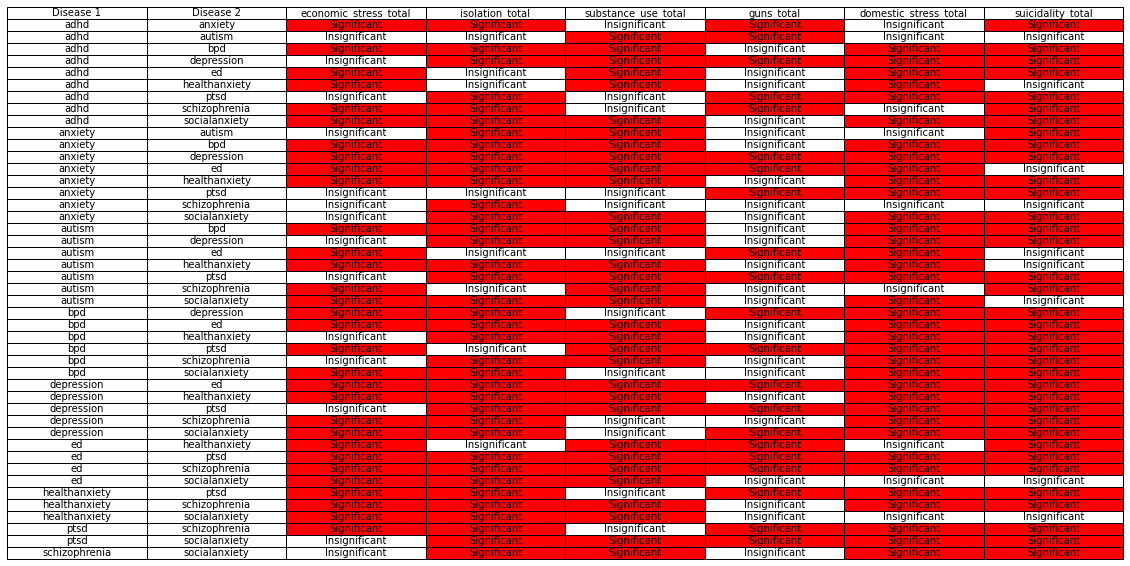

In [50]:
export_pdf_png(stress_and_health_anova_df, "anova_test", "stress_and_health")

In [51]:
export_ipywidgets(stress_and_health_anova_df, stress_and_health_anova_significant_pairs)

GridBox(children=(Button(layout=Layout(width='100px'), style=ButtonStyle(button_color='white')), Button(layout…

### T-Test

In [52]:
stress_and_health_t_test_significant_pairs = t_test(stress_and_health_metrics)

stress_and_health_t_test_df = pd.DataFrame(index=pd.MultiIndex.from_tuples(itertools.combinations(datasets.keys(), 2)), columns=stress_and_health_metrics)

T-test results for economic_stress_total between adhd and anxiety: T-statistic = 3.4959409451840897, p-value = 0.00047388859911384046
T-test results for economic_stress_total between adhd and autism: T-statistic = 0.03664422999101845, p-value = 0.9707699397928884
T-test results for economic_stress_total between adhd and bpd: T-statistic = 6.416372555019836, p-value = 1.481190134724106e-10
T-test results for economic_stress_total between adhd and depression: T-statistic = -0.7647512535757853, p-value = 0.44442576766879327
T-test results for economic_stress_total between adhd and ed: T-statistic = 15.930184633728645, p-value = 3.079470079773483e-56
T-test results for economic_stress_total between adhd and healthanxiety: T-statistic = 5.517106938410271, p-value = 3.592797555587537e-08
T-test results for economic_stress_total between adhd and ptsd: T-statistic = 0.6456204874246569, p-value = 0.5185506531270254
T-test results for economic_stress_total between adhd and schizophrenia: T-stati

In [53]:
pretty_table(stress_and_health_t_test_df, stress_and_health_t_test_significant_pairs)

+------------------------------------+-----------------------+-----------------+---------------------+---------------+-----------------------+-------------------+
|           Condition Pair           | economic_stress_total | isolation_total | substance_use_total |   guns_total  | domestic_stress_total | suicidality_total |
+------------------------------------+-----------------------+-----------------+---------------------+---------------+-----------------------+-------------------+
|        ('adhd', 'anxiety')         |      Significant      |   Significant   |    Insignificant    |  Significant  |     Insignificant     |    Significant    |
|         ('adhd', 'autism')         |     Insignificant     |  Insignificant  |     Significant     |  Significant  |     Insignificant     |   Insignificant   |
|          ('adhd', 'bpd')           |      Significant      |   Significant   |     Significant     | Insignificant |      Significant      |    Significant    |
|       ('adhd', 'depr

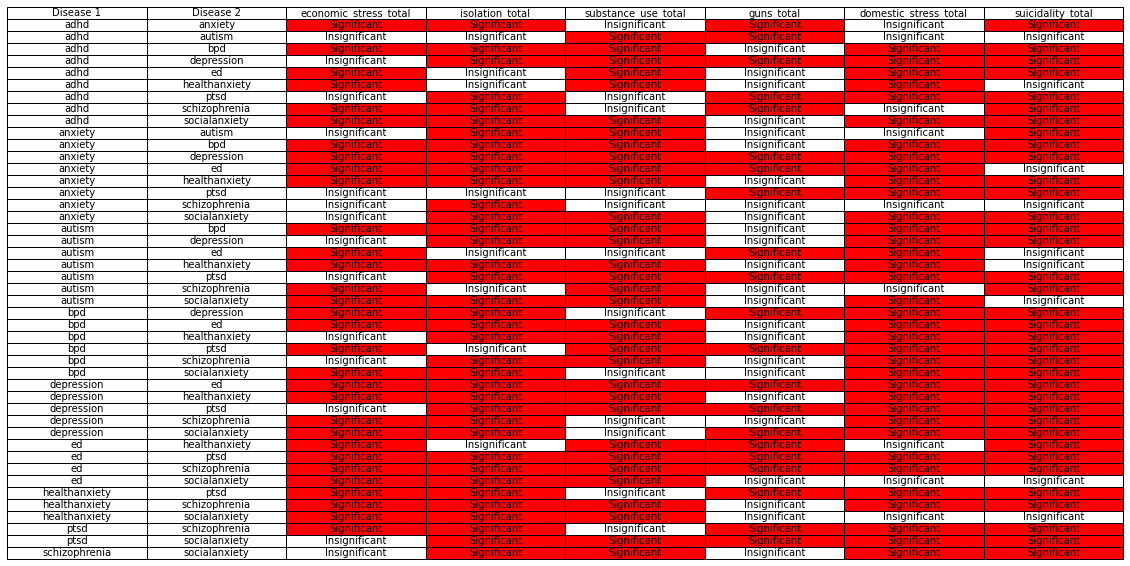

In [54]:
export_pdf_png(stress_and_health_t_test_df, "t_test", "stress_and_health")

In [55]:
export_ipywidgets(stress_and_health_t_test_df, stress_and_health_t_test_significant_pairs)

GridBox(children=(Button(layout=Layout(width='100px'), style=ButtonStyle(button_color='white')), Button(layout…

### Tukey's HSD Test

In [56]:
stress_and_health_tukey_significant_pairs = tukey_test(stress_and_health_metrics)

stress_and_health_tukey_df = pd.DataFrame(index=pd.MultiIndex.from_tuples(itertools.combinations(datasets.keys(), 2)), columns=stress_and_health_metrics)

Tukey results for economic_stress_total between adhd and anxiety: Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1  group2 meandiff p-adj   lower  upper  reject
----------------------------------------------------
  adhd anxiety  -0.1023 0.0005 -0.1597 -0.045   True
----------------------------------------------------
Tukey results for economic_stress_total between adhd and autism: Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj  lower  upper  reject
--------------------------------------------------
  adhd autism  -0.0025 0.9708 -0.138 0.1329  False
--------------------------------------------------
Tukey results for economic_stress_total between adhd and bpd: Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj  lower   upper  reject
---------------------------------------------------
  adhd    bpd  -0.2538   0.0 -0.3314 -0.1763   True
---------------------------------------------------
Tukey results for economic

In [57]:
pretty_table(stress_and_health_tukey_df, stress_and_health_tukey_significant_pairs)

+------------------------------------+-----------------------+-----------------+---------------------+---------------+-----------------------+-------------------+
|           Condition Pair           | economic_stress_total | isolation_total | substance_use_total |   guns_total  | domestic_stress_total | suicidality_total |
+------------------------------------+-----------------------+-----------------+---------------------+---------------+-----------------------+-------------------+
|        ('adhd', 'anxiety')         |      Significant      |   Significant   |    Insignificant    |  Significant  |     Insignificant     |    Significant    |
|         ('adhd', 'autism')         |     Insignificant     |  Insignificant  |     Significant     |  Significant  |     Insignificant     |   Insignificant   |
|          ('adhd', 'bpd')           |      Significant      |   Significant   |     Significant     | Insignificant |      Significant      |    Significant    |
|       ('adhd', 'depr

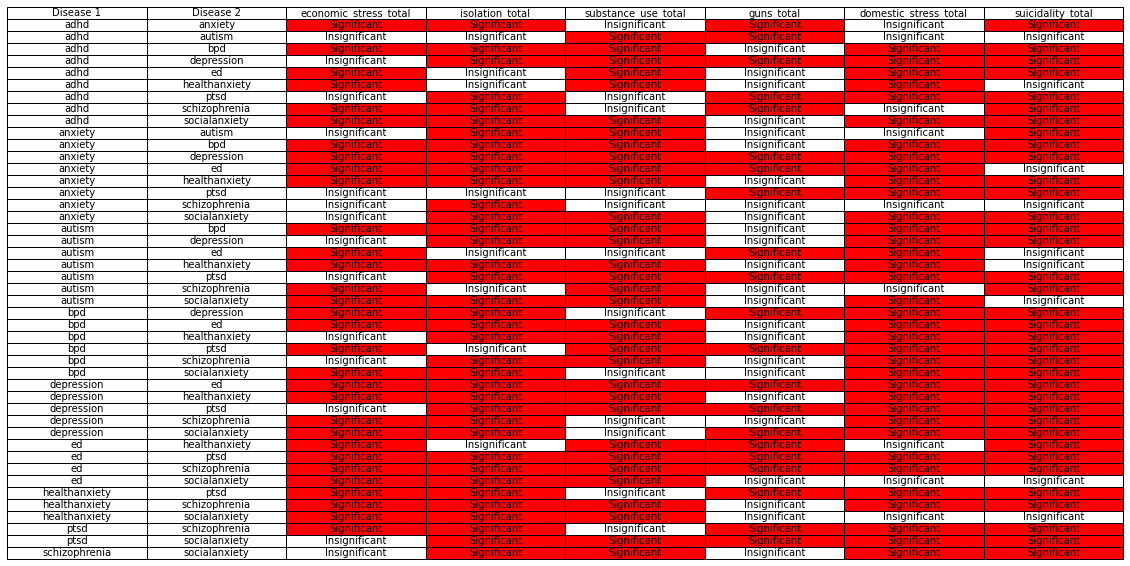

In [58]:
export_pdf_png(stress_and_health_tukey_df, "tukey_test", "stress_and_health")

In [59]:
export_ipywidgets(stress_and_health_tukey_df, stress_and_health_tukey_significant_pairs)

GridBox(children=(Button(layout=Layout(width='100px'), style=ButtonStyle(button_color='white')), Button(layout…

### Effect Size Calculation

In [60]:
stress_and_health_cohens_d_significant_parameters = effect_size_calculation(stress_and_health_metrics)

stress_and_health_cohens_d_df = pd.DataFrame(index=pd.MultiIndex.from_tuples(itertools.combinations(datasets.keys(), 2)), columns=stress_and_health_metrics)


Effect sizes for all combinations of datasets and parameters:
Effect sizes for economic_stress_total:
('adhd', 'anxiety'): Cohen's d = 0.06177135140287649
('adhd', 'autism'): Cohen's d = 0.0014931760007213556
('adhd', 'bpd'): Cohen's d = 0.16050813081559973
('adhd', 'depression'): Cohen's d = -0.011759975926606958
('adhd', 'ed'): Cohen's d = 0.38438224612393207
('adhd', 'healthanxiety'): Cohen's d = 0.21036844207557556
('adhd', 'ptsd'): Cohen's d = 0.025959263680089162
('adhd', 'schizophrenia'): Cohen's d = 0.11805176991106194
('adhd', 'socialanxiety'): Cohen's d = 0.09736047032452098
('anxiety', 'autism'): Cohen's d = -0.06102260769244012
('anxiety', 'bpd'): Cohen's d = 0.0967874496799935
('anxiety', 'depression'): Cohen's d = -0.06953063655909547
('anxiety', 'ed'): Cohen's d = 0.30823049188028095
('anxiety', 'healthanxiety'): Cohen's d = 0.15005992681430977
('anxiety', 'ptsd'): Cohen's d = -0.035636443329663876
('anxiety', 'schizophrenia'): Cohen's d = 0.057027223484683434
('anxiety

## LIWC

### ANOVA Test

In [61]:
liwc_anova_significant_pairs = anova_test(liwc_metrics)

liwc_anova_df = pd.DataFrame(index=pd.MultiIndex.from_tuples(itertools.combinations(datasets.keys(), 2)), columns=liwc_metrics)

ANOVA results for liwc_1st_pers between adhd and anxiety: F-statistic = 5.113389970590476, p-value = 0.02375750607781681
ANOVA results for liwc_1st_pers between adhd and autism: F-statistic = 156.8606025743215, p-value = 1.5796001714077893e-35
ANOVA results for liwc_1st_pers between adhd and bpd: F-statistic = 114.86836566794626, p-value = 1.3147772866746945e-26
ANOVA results for liwc_1st_pers between adhd and depression: F-statistic = 28.38451220819972, p-value = 1.0018275458194653e-07
ANOVA results for liwc_1st_pers between adhd and ed: F-statistic = 17.642225409214586, p-value = 2.696104450598656e-05
ANOVA results for liwc_1st_pers between adhd and healthanxiety: F-statistic = 10.618172285507287, p-value = 0.001126155276730762
ANOVA results for liwc_1st_pers between adhd and ptsd: F-statistic = 48.24107596119601, p-value = 4.180723008925053e-12
ANOVA results for liwc_1st_pers between adhd and schizophrenia: F-statistic = 9.809676423278892, p-value = 0.0017441408599961213
ANOVA resul

In [62]:
pretty_table(liwc_anova_df, liwc_anova_significant_pairs)

+------------------------------------+---------------+---------------+---------------+------------------+---------------+--------------------------+---------------+---------------+-----------------------+---------------+----------------------+-----------------+---------------+----------------+----------------+----------------+-------------------+-------------------+---------------+------------------+----------------+---------------+---------------+---------------+---------------+-------------------+---------------+---------------+---------------+---------------+--------------------------+----------------+----------------+-----------------+---------------+---------------+---------------+---------------+----------------+-----------------------+-------------------+---------------+-----------------+---------------------------+------------------------+-----------------------+-------------------+--------------------+------------------+-----------------+---------------+---------------+-------

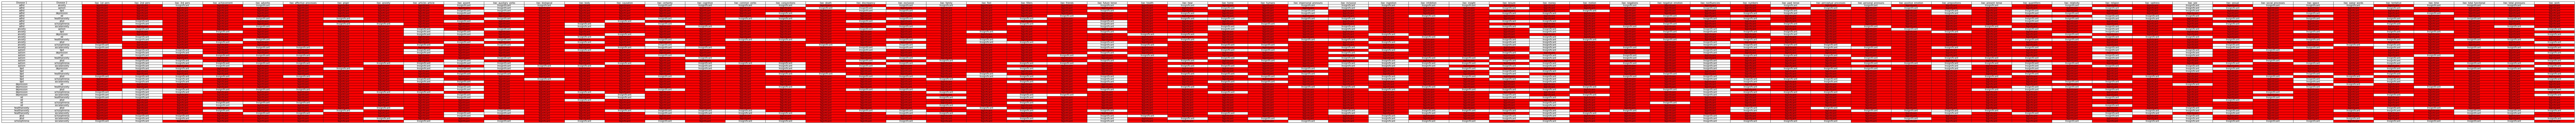

In [63]:
export_pdf_png(liwc_anova_df, "anova_test", "liwc")

In [64]:
export_ipywidgets(liwc_anova_df, liwc_anova_significant_pairs)

GridBox(children=(Button(layout=Layout(width='100px'), style=ButtonStyle(button_color='white')), Button(layout…

### T-Test

In [65]:
liwc_t_test_significant_pairs = t_test(liwc_metrics)

liwc_t_test_df = pd.DataFrame(index=pd.MultiIndex.from_tuples(itertools.combinations(datasets.keys(), 2)), columns=liwc_metrics)

T-test results for liwc_1st_pers between adhd and anxiety: T-statistic = -2.2612806041246807, p-value = 0.023757506077841346
T-test results for liwc_1st_pers between adhd and autism: T-statistic = -12.524400288010659, p-value = 1.579600171407966e-35
T-test results for liwc_1st_pers between adhd and bpd: T-statistic = -10.717666055067504, p-value = 1.3147772866709416e-26
T-test results for liwc_1st_pers between adhd and depression: T-statistic = -5.327711723451233, p-value = 1.0018275458347887e-07
T-test results for liwc_1st_pers between adhd and ed: T-statistic = 4.200264921313248, p-value = 2.696104450607252e-05
T-test results for liwc_1st_pers between adhd and healthanxiety: T-statistic = 3.258553710698549, p-value = 0.0011261552767243856
T-test results for liwc_1st_pers between adhd and ptsd: T-statistic = -6.945579598650931, p-value = 4.180723008915736e-12
T-test results for liwc_1st_pers between adhd and schizophrenia: T-statistic = -3.1320402971990786, p-value = 0.001744140859993

In [66]:
pretty_table(liwc_t_test_df, liwc_t_test_significant_pairs)

+------------------------------------+---------------+---------------+---------------+------------------+---------------+--------------------------+---------------+---------------+-----------------------+---------------+----------------------+-----------------+---------------+----------------+----------------+----------------+-------------------+-------------------+---------------+------------------+----------------+---------------+---------------+---------------+---------------+-------------------+---------------+---------------+---------------+---------------+--------------------------+----------------+----------------+-----------------+---------------+---------------+---------------+---------------+----------------+-----------------------+-------------------+---------------+-----------------+---------------------------+------------------------+-----------------------+-------------------+--------------------+------------------+-----------------+---------------+---------------+-------

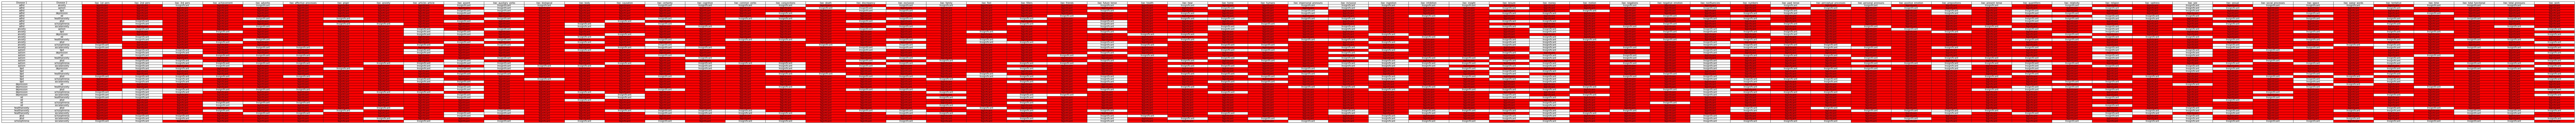

In [67]:
export_pdf_png(liwc_t_test_df, "t_test", "liwc")

In [68]:
export_ipywidgets(liwc_t_test_df, liwc_t_test_significant_pairs)

GridBox(children=(Button(layout=Layout(width='100px'), style=ButtonStyle(button_color='white')), Button(layout…

### Tukey's HSD Test

In [69]:
liwc_tukey_significant_pairs = tukey_test(liwc_metrics)

liwc_tukey_df = pd.DataFrame(index=pd.MultiIndex.from_tuples(itertools.combinations(datasets.keys(), 2)), columns=liwc_metrics)

Tukey results for liwc_1st_pers between adhd and anxiety: Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1  group2 meandiff p-adj  lower  upper  reject
---------------------------------------------------
  adhd anxiety   0.0569 0.0238 0.0076 0.1063   True
---------------------------------------------------
Tukey results for liwc_1st_pers between adhd and autism: Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj lower  upper reject
------------------------------------------------
  adhd autism   0.7462   0.0 0.6294 0.863   True
------------------------------------------------
Tukey results for liwc_1st_pers between adhd and bpd: Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj lower  upper reject
------------------------------------------------
  adhd    bpd   0.3838   0.0 0.3136 0.454   True
------------------------------------------------
Tukey results for liwc_1st_pers between adhd and depression:  Multiple Comp

In [70]:
pretty_table(liwc_tukey_df, liwc_tukey_significant_pairs)

+------------------------------------+---------------+---------------+---------------+------------------+---------------+--------------------------+---------------+---------------+-----------------------+---------------+----------------------+-----------------+---------------+----------------+----------------+----------------+-------------------+-------------------+---------------+------------------+----------------+---------------+---------------+---------------+---------------+-------------------+---------------+---------------+---------------+---------------+--------------------------+----------------+----------------+-----------------+---------------+---------------+---------------+---------------+----------------+-----------------------+-------------------+---------------+-----------------+---------------------------+------------------------+-----------------------+-------------------+--------------------+------------------+-----------------+---------------+---------------+-------

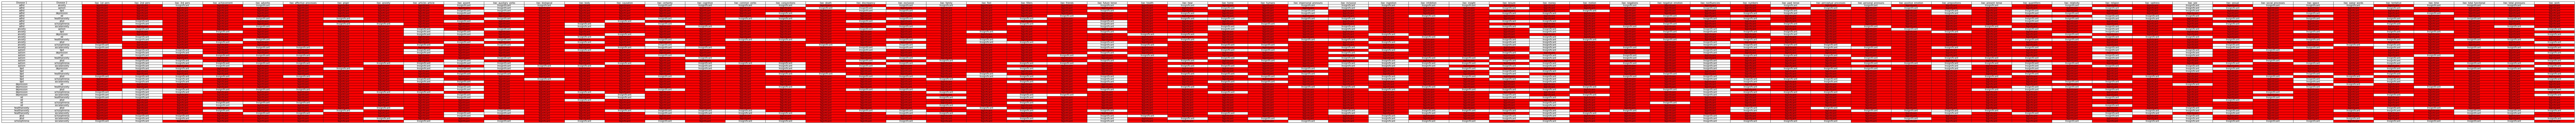

In [71]:
export_pdf_png(liwc_tukey_df, "tukey_test", "liwc")

In [72]:
export_ipywidgets(liwc_tukey_df, liwc_tukey_significant_pairs)

GridBox(children=(Button(layout=Layout(width='100px'), style=ButtonStyle(button_color='white')), Button(layout…

### Effect Size Calculation

In [73]:
liwc_cohens_d_significant_parameters = effect_size_calculation(liwc_metrics)

liwc_cohens_d_df = pd.DataFrame(index=pd.MultiIndex.from_tuples(itertools.combinations(datasets.keys(), 2)), columns=liwc_metrics)


Effect sizes for all combinations of datasets and parameters:
Effect sizes for liwc_1st_pers:
('adhd', 'anxiety'): Cohen's d = -0.039955402714154
('adhd', 'autism'): Cohen's d = -0.5104275657702662
('adhd', 'bpd'): Cohen's d = -0.26811566818776666
('adhd', 'depression'): Cohen's d = -0.08192668911672794
('adhd', 'ed'): Cohen's d = 0.10135049377786035
('adhd', 'healthanxiety'): Cohen's d = 0.1242507852469829
('adhd', 'ptsd'): Cohen's d = -0.2792914021851058
('adhd', 'schizophrenia'): Cohen's d = -0.10752086030773642
('adhd', 'socialanxiety'): Cohen's d = -0.0603425481626732
('anxiety', 'autism'): Cohen's d = -0.42198997460945986
('anxiety', 'bpd'): Cohen's d = -0.2055857408343757
('anxiety', 'depression'): Cohen's d = -0.04445228020175219
('anxiety', 'ed'): Cohen's d = 0.12230550724420625
('anxiety', 'healthanxiety'): Cohen's d = 0.13763281751484685
('anxiety', 'ptsd'): Cohen's d = -0.20134911583444354
('anxiety', 'schizophrenia'): Cohen's d = -0.05505092900166768
('anxiety', 'socialan